#Directory, Libraries, Data

In [73]:
#Directory
%cd /content/drive/MyDrive/Business Analyst/Econometrics and Causal Inference/Matching

/content/drive/MyDrive/Business Analyst/Econometrics and Causal Inference/Matching


In [74]:
#Install libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import statsmodels.api as sm
from causalinference import CausalModel

In [75]:
#Load data
df = pd.read_csv('school.csv')
df.head()

,childid,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized
0,0001002C,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.50,77.5,62500.5,0,0,0.981753
1,0001004C,0,"WHITE, NON-HISPANIC",1,41,48,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,34.95,53.5,45000.5,0,0,0.594378
2,0001010C,0,"WHITE, NON-HISPANIC",1,43,55,"MASTER'S DEGREE (MA, MS)",GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,63.43,53.5,62500.5,0,0,0.490611
3,0001011C,1,"WHITE, NON-HISPANIC",1,38,39,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,53.50,53.5,87500.5,0,0,1.451278
4,0001012C,0,"WHITE, NON-HISPANIC",1,47,57,DOCTORATE OR PROFESSIONAL DEGREE,"MASTER'S DEGREE (MA, MS)",61.56,77.5,150000.5,0,0,2.595699


#Data Analysis

In [76]:
#Compare the averages of both groups
df.groupby('catholic').mean(numeric_only=True)

,number_places_lived,mom_age,dad_age,mom_score,dad_score,income,poverty,food_stamps,score_standardized
catholic,,,,,,,,,
0,1.106246,37.794621,40.134919,43.909495,42.590520,65393.928540,0.101578,0.045566,0.163128
1,1.073118,39.775269,42.007527,47.620871,45.908269,86180.625269,0.016129,0.006452,0.219685


In [77]:
#t-test
group1 = df.where(df.catholic == 0).dropna()['income']
group2 = df.where(df.catholic == 1).dropna()['income']

In [78]:
stat, p= ss.ttest_ind(group1, group2)
print(p)

5.943636213205364e-41


In [79]:
#Get the continuous variables
continuous = ['number_places_lived', 'mom_age', 'dad_age', 'mom_score', 'dad_score', 'income']

#Storing results
stat = {}
p = {}

#Loop
for x in continuous:
  group1 = df.where(df.catholic == 0).dropna()[x]
  group2 = df.where(df.catholic == 1).dropna()[x]
  stat[x], p[x]= ss.ttest_ind(group1, group2)
ttests = pd.DataFrame.from_dict(p, orient='index')
ttests.columns = ['pvalue']
print(ttests)

                           pvalue
number_places_lived  7.072609e-03
mom_age              1.359492e-22
dad_age              3.344265e-16
mom_score            2.280116e-19
dad_score            5.489722e-18
income               5.943636e-41


In [80]:
#Chi-Square
tab = pd.crosstab(index = df.poverty,
                  columns= df.catholic)
stat, p, dof, exp = ss.chi2_contingency (tab)
print(p)

6.511354893726035e-17


In [81]:
#what to loop
categorical = ['poverty', 'food_stamps']

#Where to store
p = {}

#Loop
for y in categorical:
  tab = pd.crosstab(index = df[y],
                    columns = df.catholic)
  stat, p[y], dof, exp = ss.chi2_contingency(tab)
chi = pd.DataFrame.from_dict(p, orient='index')
chi.columns = ['pvalue']
print(chi)

                   pvalue
poverty      6.511355e-17
food_stamps  3.294153e-08


#Data Preparation

In [82]:
#Race variable
df.race.value_counts()

,count
race,
"WHITE, NON-HISPANIC",3654
"HISPANIC, RACE NOT SPECIFIED",408
"HISPANIC, RACE SPECIFIED",387
"BLACK OR AFRICAN AMERICAN, NON-HISPANIC",357
ASIAN,342
"MORE THAN ONE RACE, NON HISPANIC",123
"NATIVE HAWAIIAN, OTHER PACIFIC ISLANDER",93
AMERICAN INDIAN OR ALASKA NATIVE,62
NOT ASCERTAINED,3


In [83]:
#Transforming race variables
df['race_white'] = np.where(df.race == 'WHITE, NON-HISPANIC', 1, 0)
df['race_hispanic'] = np.where((df.race == 'HISPANIC, RACE NOT SPECIFIED') |
                               (df.race == 'HISPANIC, RACE SPECIFIED'), 1, 0)
df['race_black'] = np.where(df.race == 'BLACK OR AFRICAN AMERICAN, NON-HISPANIC', 1, 0)
df['race_asian'] = np.where(df.race == 'ASIAN', 1, 0)

In [84]:
df.head(2)

,childid,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized,race_white,race_hispanic,race_black,race_asian
0,0001002C,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.50,77.5,62500.5,0,0,0.981753,1,0,0,0
1,0001004C,0,"WHITE, NON-HISPANIC",1,41,48,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,34.95,53.5,45000.5,0,0,0.594378,1,0,0,0


In [85]:
#Education variable overview
df.mom_education.value_counts()

,count
mom_education,
SOME COLLEGE,1721
HIGH SCHOOL DIPLOMA/EQUIVALENT,1306
BACHELOR'S DEGREE,1085
"MASTER'S DEGREE (MA, MS)",387
VOC/TECH PROGRAM,294
9TH - 12TH GRADE,222
GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,170
8TH GRADE OR BELOW,134
DOCTORATE OR PROFESSIONAL DEGREE,110


In [86]:
#Transforming education variable
df["dad_higher_education"] = np.where((df.dad_education == "BACHELOR'S DEGREE") |
                                      (df.dad_education == "MASTER'S DEGREE (MA, MS)") |
                                      (df.dad_education == "DOCTORATE OR PROFESSIONAL DEGREE"),
                                      1, 0)
df["mom_higher_education"] = np.where((df.mom_education == "BACHELOR'S DEGREE") |
                                      (df.mom_education == "MASTER'S DEGREE (MA, MS)") |
                                      (df.mom_education == "DOCTORATE OR PROFESSIONAL DEGREE"),
                                      1, 0)

In [87]:
df.head(1)

,childid,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized,race_white,race_hispanic,race_black,race_asian,dad_higher_education,mom_higher_education
0,0001002C,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.5,77.5,62500.5,0,0,0.981753,1,0,0,0,1,0


In [88]:
#Clean the DF
df = df.drop(columns = ["race", "dad_education", "mom_education"])
df.head(1)

,childid,catholic,number_places_lived,mom_age,dad_age,mom_score,dad_score,income,poverty,food_stamps,score_standardized,race_white,race_hispanic,race_black,race_asian,dad_higher_education,mom_higher_education
0,0001002C,0,1,47,45,53.5,77.5,62500.5,0,0,0.981753,1,0,0,0,1,0


In [89]:
#Isolate confounders, treat, y
treat = df.catholic.values
y = df.score_standardized.values
# Select only numeric columns for confounders
confounders = df.drop(columns = ['catholic', 'score_standardized', 'childid']).select_dtypes(include=np.number).values

#Common Support Region

In [90]:
#Logist Regression
confounders_csr = sm.add_constant(confounders)
csr_model = sm.Logit(treat, confounders_csr).fit()
print(csr_model.summary())

Optimization terminated successfully.
         Current function value: 0.430983
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 5429
Model:                          Logit   Df Residuals:                     5414
Method:                           MLE   Df Model:                           14
Date:                Mon, 04 Aug 2025   Pseudo R-squ.:                 0.05888
Time:                        03:18:41   Log-Likelihood:                -2339.8
converged:                       True   LL-Null:                       -2486.2
Covariance Type:            nonrobust   LLR p-value:                 3.835e-54
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3412      0.418    -10.380      0.000      -5.161      -3.521
x1            -0.1666      0.

In [91]:
#predictions
probabilities = csr_model.predict(confounders_csr)
probabilities

array([0.26041384, 0.17273291, 0.24596599, ..., 0.23182116, 0.12192314,
       0.1825144 ])

In [92]:
#build object with treat and probabilities
df_prob = np.vstack([treat, probabilities])
df_prob = np.transpose(df_prob)
df_prob

array([[0.        , 0.26041384],
       [0.        , 0.17273291],
       [0.        , 0.24596599],
       ...,
       [0.        , 0.23182116],
       [0.        , 0.12192314],
       [0.        , 0.1825144 ]])

In [93]:
#split between treated and non_treated
non_treated = df_prob[:,0] == 0
non_treated = df_prob[non_treated, 1]
treated = df_prob[:,0] == 1
treated = df_prob[treated, 1]

/tmp/ipython-input-1283303763.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_treated, shade = True, color = 'red')
/tmp/ipython-input-1283303763.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(treated, shade = True, color = 'blue')


<Axes: ylabel='Density'>

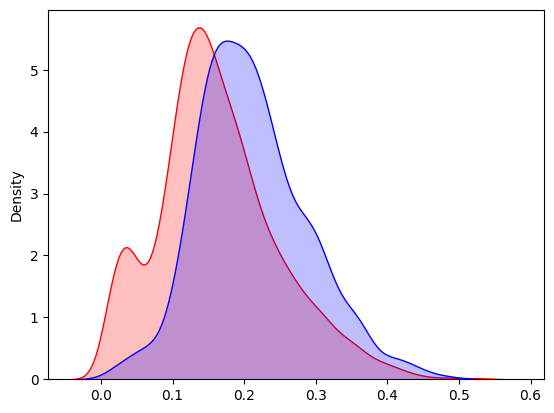

In [94]:
#plot Common Support Region
sns.kdeplot(non_treated, shade = True, color = 'red')
sns.kdeplot(treated, shade = True, color = 'blue')

#Matching Model

In [95]:
#Matching model
model = CausalModel(y, treat, confounders)
model.est_via_matching(bias_adj = True)
print(model.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.133      0.065     -2.044      0.041     -0.260     -0.005
           ATC     -0.126      0.073     -1.737      0.082     -0.268      0.016
           ATT     -0.167      0.060     -2.786      0.005     -0.284     -0.049



#Robustness check - repeated samples

In [96]:
#Isolate the coefficient
model.estimates['matching']['ate']

np.float64(-0.13297192873362437)

In [68]:
#While loop
ate = {}
i = 0

#loop
while i < 1000:
  #sampling
  sample = df.sample(1000)

  #Isolation of treat, y and confounders
  treat = sample.catholic.values
  y = sample.score_standardized.values
  confounders = sample.drop(columns = ['catholic', 'score_standardized', 'childid']).select_dtypes(include=np.number).values

  #Matching model
  model = CausalModel(y, treat, confounders)
  model.est_via_matching(bias_adj = True)

  #store the results
  ate[i] = model.estimates ['matching']['ate']

  print(i)
  i += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Axes(0.125,0.11;0.775x0.77)
-0.12423226358826946


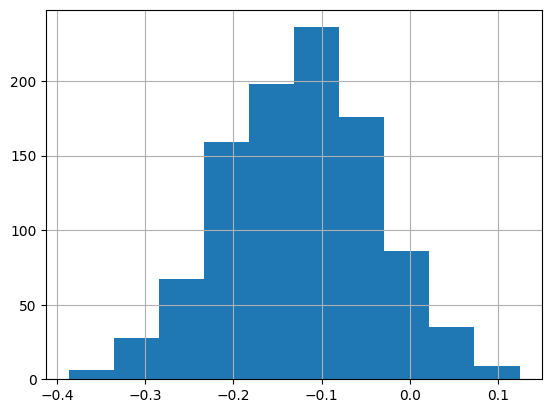

In [69]:
#Visualize results
ate = pd.Series(ate)
print(ate.hist())
print(ate.mean())

#Robustness check - removing 1 confounder

In [70]:
df.columns

Index(['childid', 'catholic', 'number_places_lived', 'mom_age', 'dad_age',
       'mom_score', 'dad_score', 'income', 'poverty', 'food_stamps',
       'score_standardized', 'race_white', 'race_hispanic', 'race_black',
       'race_asian', 'dad_higher_education', 'mom_higher_education'],
      dtype='object')

In [71]:
#New confounders list
treat = df.catholic.values
y = df.score_standardized.values
confounders = df.drop(columns = ["catholic",
                                 "score_standardized",
                                 "number_places_lived"]).values

In [97]:
#Matching Model
model = CausalModel(y, treat, confounders)
model.est_via_matching(bias_adj = True)
print(model.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.133      0.065     -2.044      0.041     -0.260     -0.005
           ATC     -0.126      0.073     -1.737      0.082     -0.268      0.016
           ATT     -0.167      0.060     -2.786      0.005     -0.284     -0.049

